# penguins: body_mass_g

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split #particionamiento de datos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


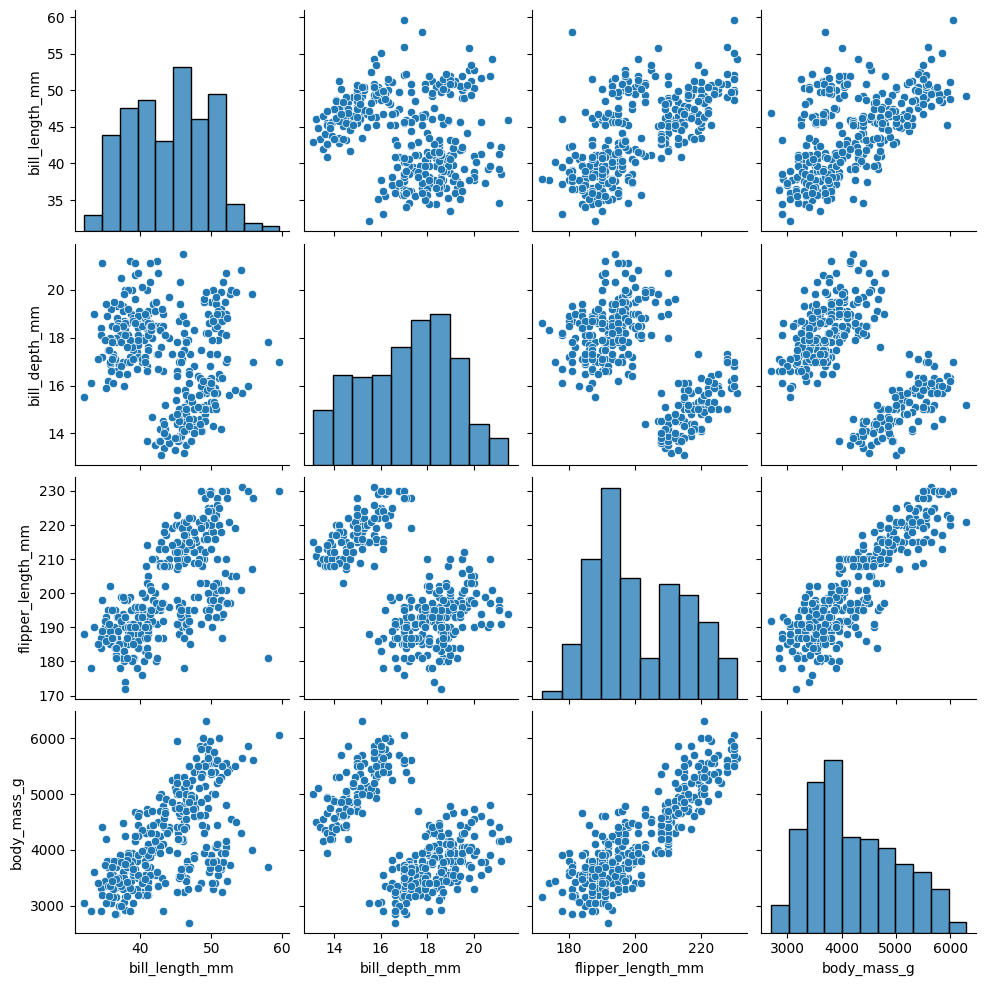

In [3]:
sns.pairplot(df)

In [4]:
#Separar X e y
X= df[['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']]
y= df['body_mass_g']
#Dataframe de resultados
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])


In [5]:
#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) #(multiplicar * 100) error promedio de 7,7 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 3col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [6]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


<Axes: >

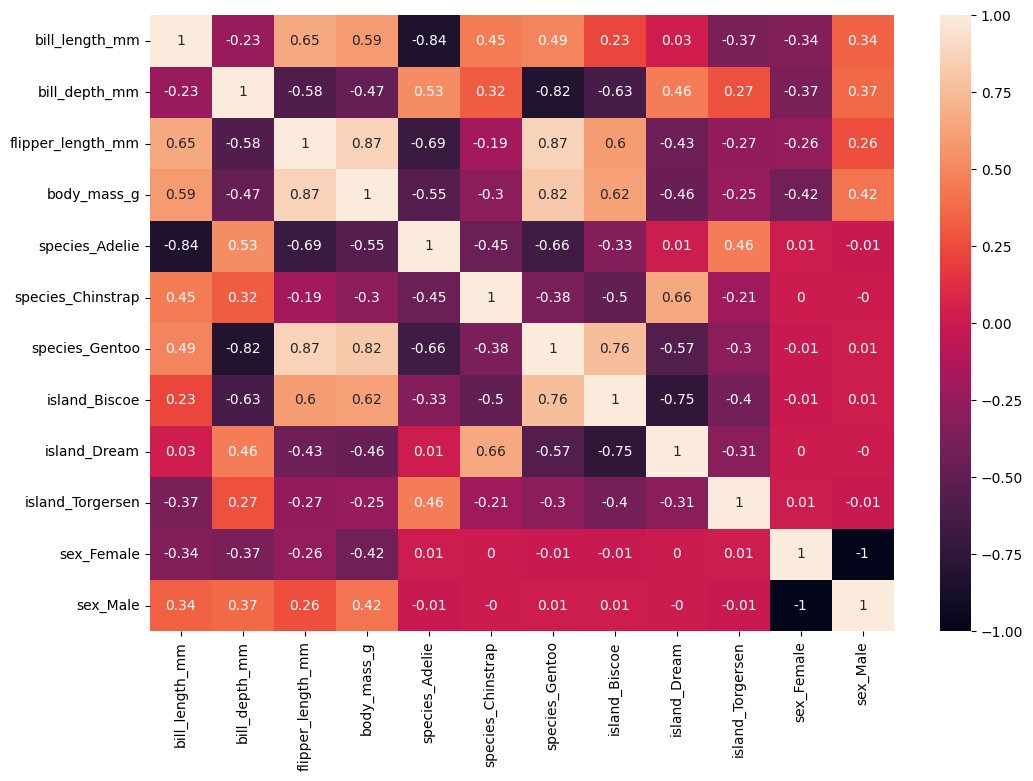

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'species_Adelie'),
  Text(1, 0, 'bill_depth_mm'),
  Text(2, 0, 'island_Dream'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'species_Chinstrap'),
  Text(5, 0, 'island_Torgersen'),
  Text(6, 0, 'sex_Male'),
  Text(7, 0, 'bill_length_mm'),
  Text(8, 0, 'island_Biscoe'),
  Text(9, 0, 'species_Gentoo'),
  Text(10, 0, 'flipper_length_mm')])

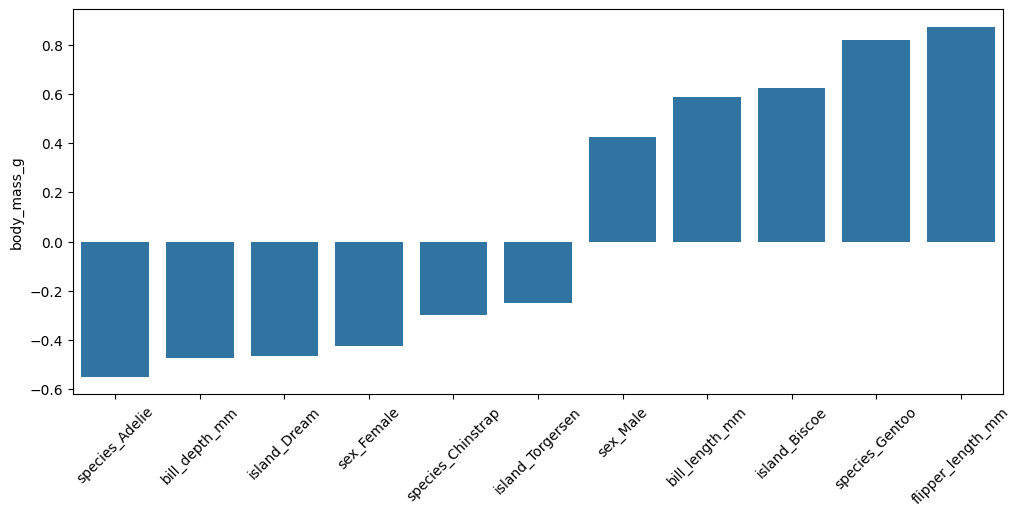

In [8]:
#correlaciones de cada columna con body_mass_g
plt.figure(figsize=(12, 5))
sns.barplot(df.corr()['body_mass_g'].drop('body_mass_g').sort_values())
plt.xticks(rotation=45)

In [9]:
X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 11col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982


In [10]:
#quitar columna sexo para con first_drop para evitar la correlacion -1 o multicolinealidad 
# observamos que da los mismos resultados que un get_dummies normales, lo que sugiere 
# que es mejor hacerlo con drop_first porque da menos columnas y el modelo es mas liviano 
# para entrenar
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)
X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['RLM 8col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982


KNN es un algoritmo computacionalmente costoso, ya que es lazy o perezoso, realiza los calculos en el predict, no existe un entrenamiento pesado como en otros metodos, el modelo simplemente almacenas los datos en el entrenamiento, y para hacer una prediccion (regresion o clasificacion) busca y calcula los K vecinos mas cercanos

In [11]:
# KNN - K Nearest Neighbors
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

X= df.drop('body_mass_g', axis=1)
y= df['body_mass_g']

#Regresion lineal multiple
model = KNeighborsRegressor()
model.fit(X, y)
y_pred = model.predict(X)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error promedio de 5,5 % respecto del valor real de la masa corporal
df_resultados.loc[len(df_resultados)] = ['Knn K = 5', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214


In [12]:
for k in range(1, 25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 
    
    df_resultados.loc[len(df_resultados)] = [f'Knn K = {k}', r2, mae, rmse, mape] 

df_resultados.sort_values('MAPE', inplace=True)
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn K = 2,0.922721,172.409910,223.507101,0.042347
6,Knn K = 3,0.894704,204.179179,260.894981,0.050295
7,Knn K = 4,0.885988,211.524024,271.477923,0.051974
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
8,Knn K = 5,0.876481,220.420420,282.569718,0.054214
9,Knn K = 6,0.874647,223.961461,284.660507,0.055181
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
10,Knn K = 7,0.869713,227.670528,290.208117,0.056204


In [13]:
#escalado y volver a probar KNN
#KNN es sensible al escalado

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for k in range(2, 15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 
    
    df_resultados.loc[len(df_resultados)] = [f'Knn scaled K = {k}', r2, mae, rmse, mape] 



In [14]:
df_resultados.sort_values('MAE', ascending=True)

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
28,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
5,Knn K = 2,0.922721,172.409910,223.507101,0.042347
29,Knn scaled K = 3,0.922368,180.230230,224.015847,0.044620
30,Knn scaled K = 4,0.908940,194.050300,242.618359,0.048178
31,Knn scaled K = 5,0.903271,197.267267,250.056150,0.048960
6,Knn K = 3,0.894704,204.179179,260.894981,0.050295
32,Knn scaled K = 6,0.895868,205.993493,259.448877,0.051121
33,Knn scaled K = 7,0.894332,207.346632,261.355529,0.051363
34,Knn scaled K = 8,0.891224,209.984985,265.171347,0.051982


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM all test', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
5,Knn K = 2,0.922721,172.409910,223.507101,0.042347
6,Knn K = 3,0.894704,204.179179,260.894981,0.050295
7,Knn K = 4,0.885988,211.524024,271.477923,0.051974
3,Knn K = 5,0.876481,220.420420,282.569718,0.054214
8,Knn K = 5,0.876481,220.420420,282.569718,0.054214
9,Knn K = 6,0.874647,223.961461,284.660507,0.055181
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
10,Knn K = 7,0.869713,227.670528,290.208117,0.056204


In [20]:
df_resultados.sort_values('MAPE', ascending=True)


,Modelo,R2,MAE,RMSE,MAPE
4,Knn K = 1,1.000000,0.000000,0.000000,0.000000
28,Knn scaled K = 2,0.938673,157.057057,199.106488,0.038662
5,Knn K = 2,0.922721,172.409910,223.507101,0.042347
29,Knn scaled K = 3,0.922368,180.230230,224.015847,0.044620
30,Knn scaled K = 4,0.908940,194.050300,242.618359,0.048178
31,Knn scaled K = 5,0.903271,197.267267,250.056150,0.048960
6,Knn K = 3,0.894704,204.179179,260.894981,0.050295
32,Knn scaled K = 6,0.895868,205.993493,259.448877,0.051121
33,Knn scaled K = 7,0.894332,207.346632,261.355529,0.051363
7,Knn K = 4,0.885988,211.524024,271.477923,0.051974


In [ ]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM all test', r2, mae, rmse, mape]
df_resultados